<a href="https://colab.research.google.com/github/data-analyst-guy/RFM-Analysis-Python-/blob/main/Project_3_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import thư viện, làm sạch data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ecommerce_retail.xlsx to ecommerce_retail.xlsx


In [ ]:
import pandas as pd
import io
# ecommerce_retail = pd.read_excel(io.BytesIO(uploaded['ecommerce_retail.xlsx']))
ecommerce_retail = pd.read_excel('ecommerce_retail.xlsx')
# Hiển thị các hàng đầu tiên của DataFrame
print(ecommerce_retail.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [ ]:
!pip install pandas openpyxl

In [ ]:
condition = pd.read_excel('ecommerce_retail.xlsx', sheet_name='Segmentation')
condition

,Segment,RFM Score,Unnamed: 2
0,Champions,"555, 554, 544, 545, 454, 455, 445","thời gian mua hàng gần nhất ngắn (5), tiền cao..."
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335",NaN
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4...",NaN
3,New Customers,"512, 511, 422, 421, 412, 411, 311",NaN
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42...",NaN
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324",NaN
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251",NaN
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2...",NaN
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113",NaN
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2...",NaN


In [ ]:
ecommerce_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
ecommerce_retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
ecommerce_retail.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
# Xóa các dòng không có ID khách hàng
filtered_df = ecommerce_retail.dropna(subset=['CustomerID'])
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
# Chỉ lấy các dòng quantity > 0
filtered_df = filtered_df[filtered_df['Quantity']>0]
filtered_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.000000,397924,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.420210,NaN,22.096788,1713.169877


In [ ]:
# Xóa các dòng có unit <= 0
filtered_df = filtered_df[filtered_df['UnitPrice']>0]
filtered_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# **Tính toán RFM và Segment**

In [ ]:
# Tính Recency
max_date = filtered_df['InvoiceDate'].max()
filtered_df['Recency'] = (max_date - filtered_df['InvoiceDate']).dt.days

# Tính Frequency bằng cách đếm số lượng hóa đơn khác nhau cho mỗi CustomerID
frequency = filtered_df.groupby('CustomerID')['InvoiceDate'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

# Thêm cột Frequency vào DataFrame ban đầu
filtered_df2 = filtered_df.merge(frequency, on='CustomerID', how='left')

# Tính Monetary
filtered_df2['Monetary'] = filtered_df2['Quantity'] * filtered_df2['UnitPrice']
filtered_df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373,33,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,33,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373,33,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,33,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,33,20.34


In [ ]:
# Tổng hợp theo CustomerID
rfm_df = filtered_df2.groupby('CustomerID').agg({
    'Recency': 'min',
    'Frequency': 'max',
    'Monetary': 'sum'
}).reset_index()

# Hiển thị DataFrame mới
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4338 non-null   float64
 1   Recency     4338 non-null   int64  
 2   Frequency   4338 non-null   int64  
 3   Monetary    4338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 135.7 KB


In [ ]:
# Tạo quintile và gán nhãn cho cột Recency
rfm_df['R_score'] = pd.qcut(rfm_df['Recency'], q=5, labels=[5,4,3,2,1])


# Tạo quintile và gán nhãn cho cột Monetary
rfm_df['M_score'] = pd.qcut(rfm_df['Monetary'], q=5, labels=[1,2,3,4,5])

# Hiển thị DataFrame mới
print(rfm_df)

      CustomerID  Recency  Frequency  Monetary R_score M_score
0        12346.0      325          1  77183.60       1       5
1        12347.0        1          7   4310.00       5       5
2        12348.0       74          4   1797.24       2       4
3        12349.0       18          1   1757.55       4       4
4        12350.0      309          1    334.40       1       2
...          ...      ...        ...       ...     ...     ...
4333     18280.0      277          1    180.60       1       1
4334     18281.0      180          1     80.82       1       1
4335     18282.0        7          2    178.05       5       1
4336     18283.0        3         16   2094.88       5       5
4337     18287.0       42          3   1837.28       3       4

[4338 rows x 6 columns]


In [ ]:
# Tạo rank cho frequency
rfm_df.sort_values(by=['Frequency','CustomerID'])
rfm_df['rank fre'] = rfm_df['Frequency'].rank(method='first')
rfm_df.head()
rfm_df['rank fre'].value_counts()

rank fre
1.0       1
2656.0    1
996.0     1
997.0     1
998.0     1
         ..
494.0     1
495.0     1
3684.0    1
1785.0    1
2836.0    1
Name: count, Length: 4338, dtype: int64

In [ ]:
# Tạo quintile và gán nhãn cho cột Frenquency
list_x = [1,2,3,4,5]
rfm_df['F_score'] = pd.qcut(rfm_df['rank fre'], q=5,labels=list_x,duplicates='drop')
rfm_df['F_score'].value_counts()


F_score
1    868
3    868
5    868
2    867
4    867
Name: count, dtype: int64

In [ ]:
rfm_df['RFM_Score'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)

In [ ]:
def map_segment(rfm):
    for index, row in condition.iterrows():
        if row['RFM Score'].find(rfm) != -1:
            return row['Segment']
    return 'Other'

In [ ]:
rfm_df['Segment'] = rfm_df['RFM_Score'].apply(lambda x: map_segment(x))
rfm_df.head()
# rfm_df.info()

,CustomerID,Recency,Frequency,Monetary,R_score,M_score,rank fre,F_score,RFM_Score,Segment
0,12346.0,325,1,77183.60,1,5,1.0,1,115,Cannot Lose Them
1,12347.0,1,7,4310.00,5,5,3642.0,5,555,Champions
2,12348.0,74,4,1797.24,2,4,2837.0,4,244,At Risk
3,12349.0,18,1,1757.55,4,4,2.0,1,414,Promising
4,12350.0,309,1,334.40,1,2,3.0,1,112,Lost customers


In [ ]:
finaldata=filtered_df2.merge(rfm_df[['CustomerID','Segment','RFM_Score']],on='CustomerID',how='left')
# finaldata.drop_duplicates(inplace=True)
finaldata.info()
finaldata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   Recency      397884 non-null  int64         
 9   Frequency    397884 non-null  int64         
 10  Monetary     397884 non-null  float64       
 11  Segment      397884 non-null  object        
 12  RFM_Score    397884 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 39.5+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,Monetary,Segment,RFM_Score
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373,33,15.30,Cannot Lose Them,155
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,33,20.34,Cannot Lose Them,155
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373,33,22.00,Cannot Lose Them,155
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,33,20.34,Cannot Lose Them,155
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,33,20.34,Cannot Lose Them,155


# **EDA and Visualization**

In [ ]:
#finaldata.info()
finaldata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,Monetary,Segment,RFM_Score
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373,33,15.30,Cannot Lose Them,155
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,33,20.34,Cannot Lose Them,155
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373,33,22.00,Cannot Lose Them,155
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,33,20.34,Cannot Lose Them,155
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,33,20.34,Cannot Lose Them,155


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-24-78523ede99b8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_country, x='Monetary', y='Country', palette='viridis')


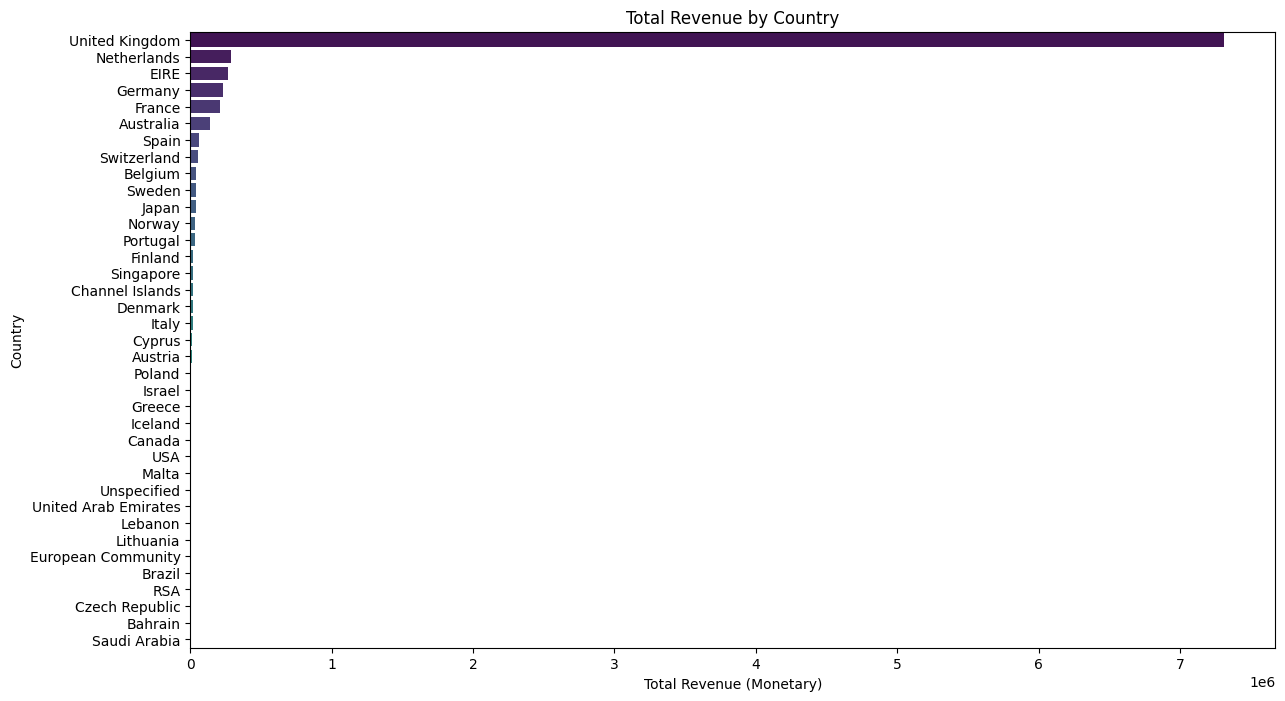

In [ ]:
# Total Revenue by Country
# Group by 'Country' and sum the 'Monetary' values
revenue_by_country = finaldata.groupby('Country')['Monetary'].sum().reset_index()

# Sort the countries by total revenue in descending order
revenue_by_country = revenue_by_country.sort_values(by='Monetary', ascending=False)

# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=revenue_by_country, x='Monetary', y='Country', palette='viridis')
plt.title('Total Revenue by Country')
plt.xlabel('Total Revenue (Monetary)')
plt.ylabel('Country')
plt.show()

In [ ]:
pip install squarify

In [ ]:
pip install humanize squarify

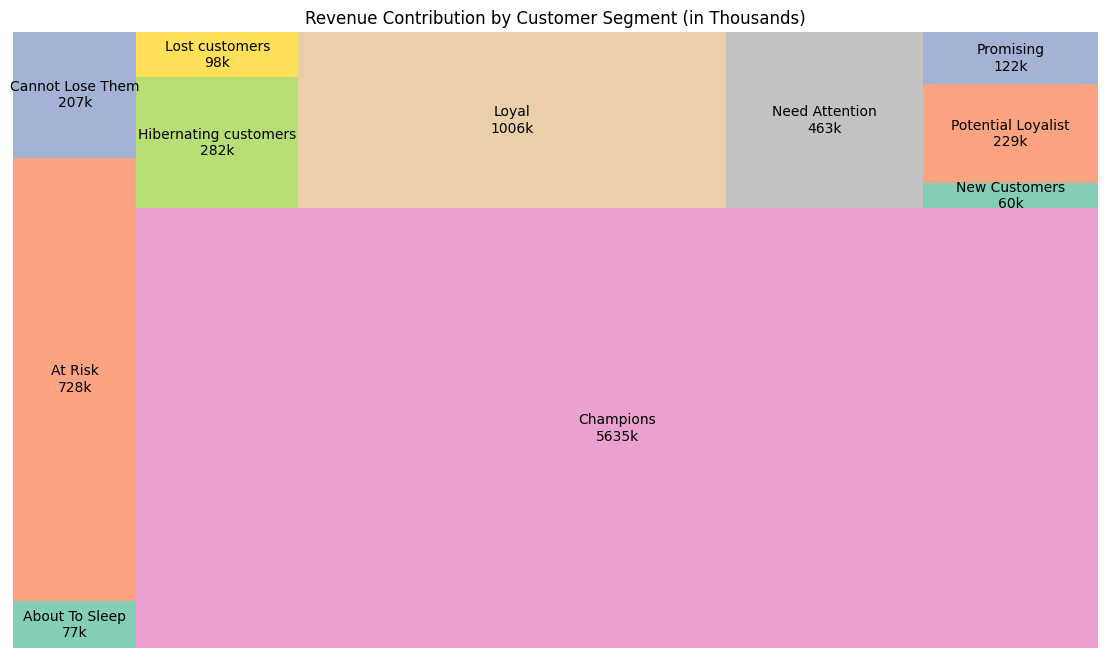

In [ ]:
import squarify
import humanize

# Group by 'Segment' and sum the 'Monetary' values
revenue_by_segment = finaldata.groupby('Segment')['Monetary'].sum().reset_index()

# Convert the monetary values to thousands (k)
revenue_by_segment['Monetary'] = revenue_by_segment['Monetary'] / 1000

# Prepare data for treemap
sizes = revenue_by_segment['Monetary']
labels = revenue_by_segment['Segment'] + '\n' + revenue_by_segment['Monetary'].astype(int).astype(str) + 'k'

# Plot the treemap
plt.figure(figsize=(14, 8))
squarify.plot(sizes=sizes, label=labels, alpha=.8, color=sns.color_palette('Set2'))
plt.title('Revenue Contribution by Customer Segment (in Thousands)')
plt.axis('off')
plt.show()

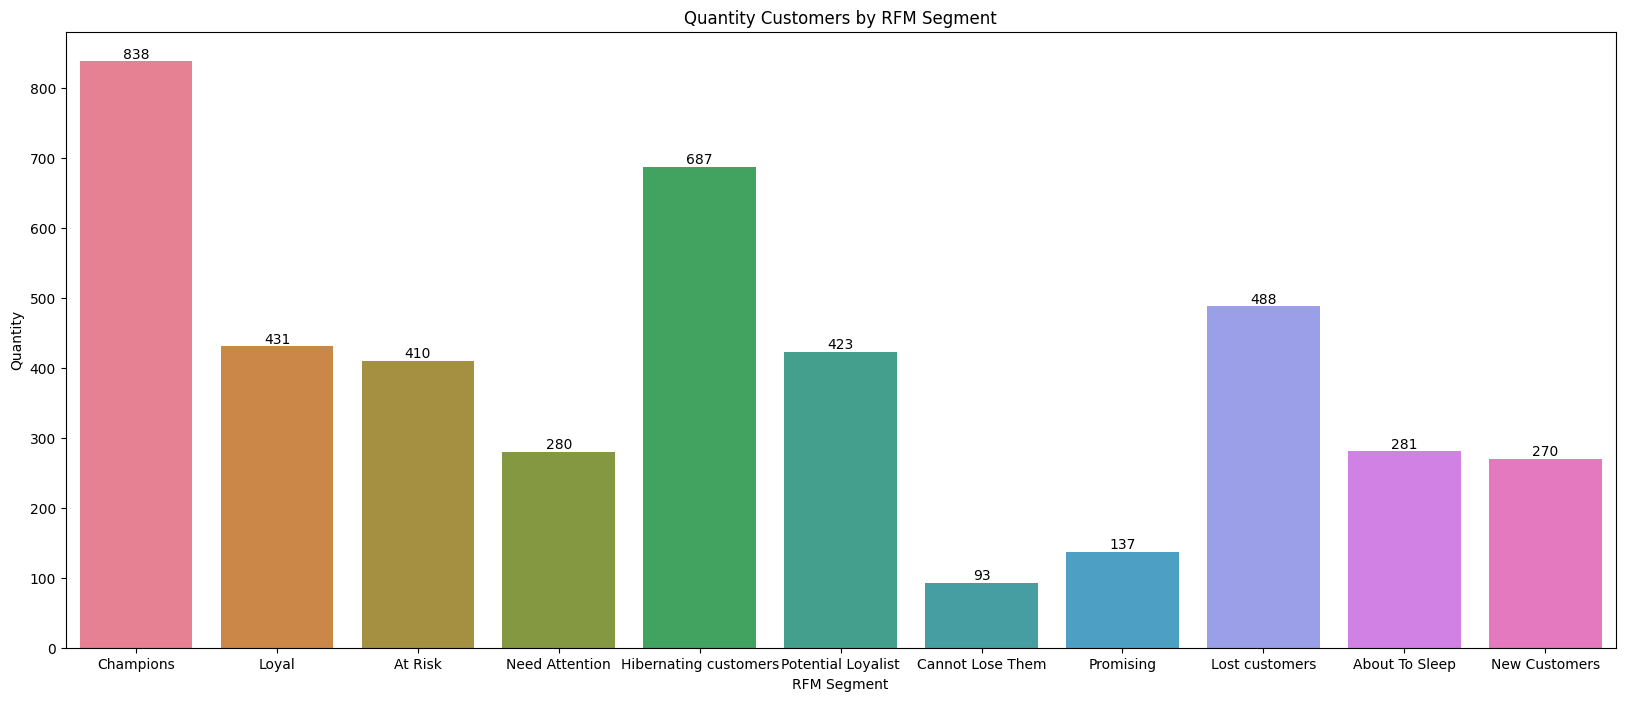

In [ ]:
plt.figure(figsize=(20, 8))
quantitycustomers_by__segment = finaldata.groupby(['Segment'])['CustomerID'].nunique()
monetary_by__segment = finaldata.groupby(['Segment'])['Monetary'].sum()
totalx = pd.concat([quantitycustomers_by__segment, monetary_by__segment], axis=1)
totalx.columns = ['Quantity', 'Monetary']

# Sắp xếp các segment theo giá trị Monetary giảm dần
totalx = totalx.sort_values(by='Monetary', ascending=False)

# Vẽ biểu đồ cột và ghi số lên từng cột
sns.barplot(x=totalx.index, y='Quantity', data=totalx, hue=totalx.index)
for i, v in enumerate(totalx['Quantity']):
    plt.text(x=i, y=v, s=str(int(v)), ha='center', va='bottom', fontsize=10)

plt.title('Quantity Customers by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Quantity')
plt.show()





<ipython-input-29-c0bed78bd3df>:23: UserWarning: 
The palette list has fewer values (7) than needed (11) and will cycle, which may produce an uninterpretable plot.
  scatter_plot = sns.scatterplot(


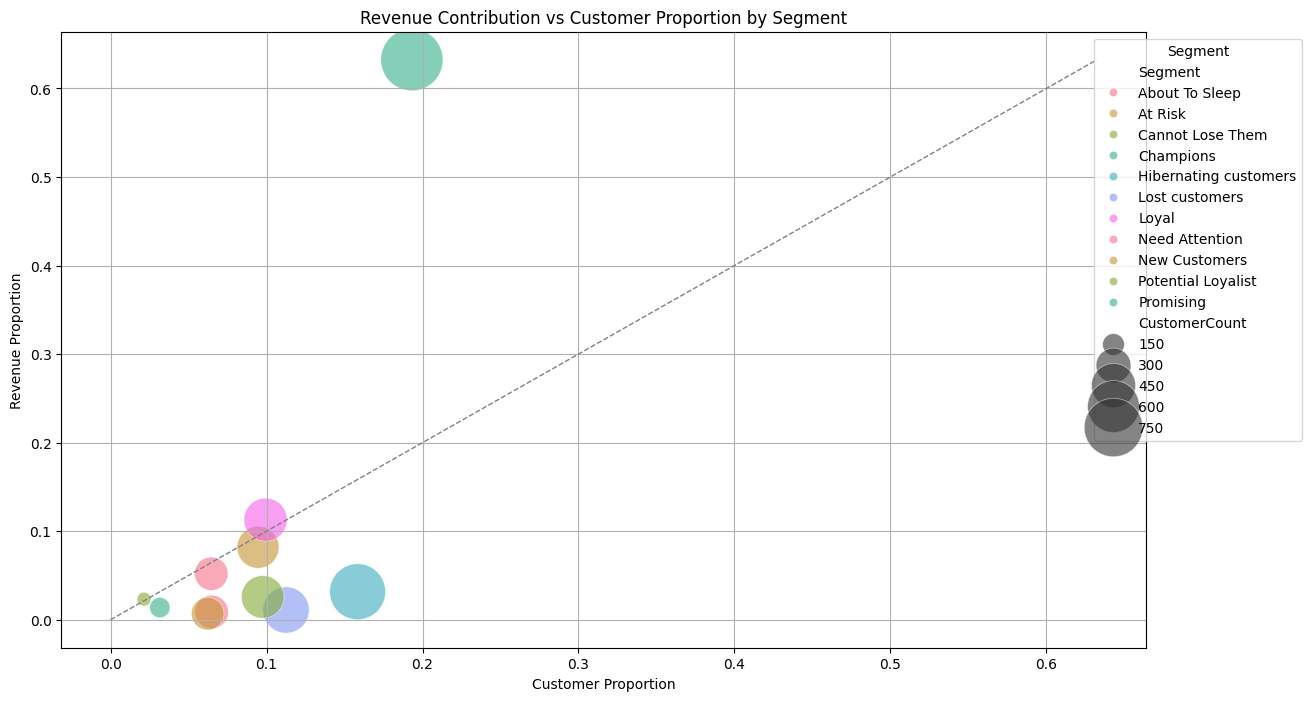

In [ ]:
# Calculate total revenue and customer count by segment
revenue_by_segment = finaldata.groupby('Segment')['Monetary'].sum().reset_index()
customer_count_by_segment = finaldata.groupby('Segment')['CustomerID'].nunique().reset_index()

# Merge the revenue and customer count data
segment_data = pd.merge(revenue_by_segment, customer_count_by_segment, on='Segment')
segment_data.columns = ['Segment', 'TotalRevenue', 'CustomerCount']

# Calculate the proportions
total_revenue = segment_data['TotalRevenue'].sum()
total_customers = segment_data['CustomerCount'].sum()
segment_data['RevenueProportion'] = segment_data['TotalRevenue'] / total_revenue
segment_data['CustomerProportion'] = segment_data['CustomerCount'] / total_customers

segment_data
# Plot the quadrant chart
plt.figure(figsize=(14, 8))
bubble_size = segment_data['CustomerCount'] * 100  # Adjust the multiplication factor as needed for better visualization

# Use a palette with at least 7 distinct colors
palette = sns.color_palette("husl", 7)

scatter_plot = sns.scatterplot(
    data=segment_data,
    x='CustomerProportion', y='RevenueProportion', size='CustomerCount',
    sizes=(100, 2000), hue='Segment', palette=palette, alpha=0.6, edgecolor='w', linewidth=0.5
)

# Plot 45 degree reference line
max_val = max(segment_data['CustomerProportion'].max(), segment_data['RevenueProportion'].max())
plt.plot([0, max_val], [0, max_val], color='gray', linestyle='--', linewidth=1)

plt.title('Revenue Contribution vs Customer Proportion by Segment')
plt.xlabel('Customer Proportion')
plt.ylabel('Revenue Proportion')
plt.grid(True)

# Adjust the legend
plt.legend(title='Segment', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()

In [ ]:
finaldata['InvoiceDate'] = pd.to_datetime(finaldata['InvoiceDate'])

<Figure size 1400x800 with 0 Axes>

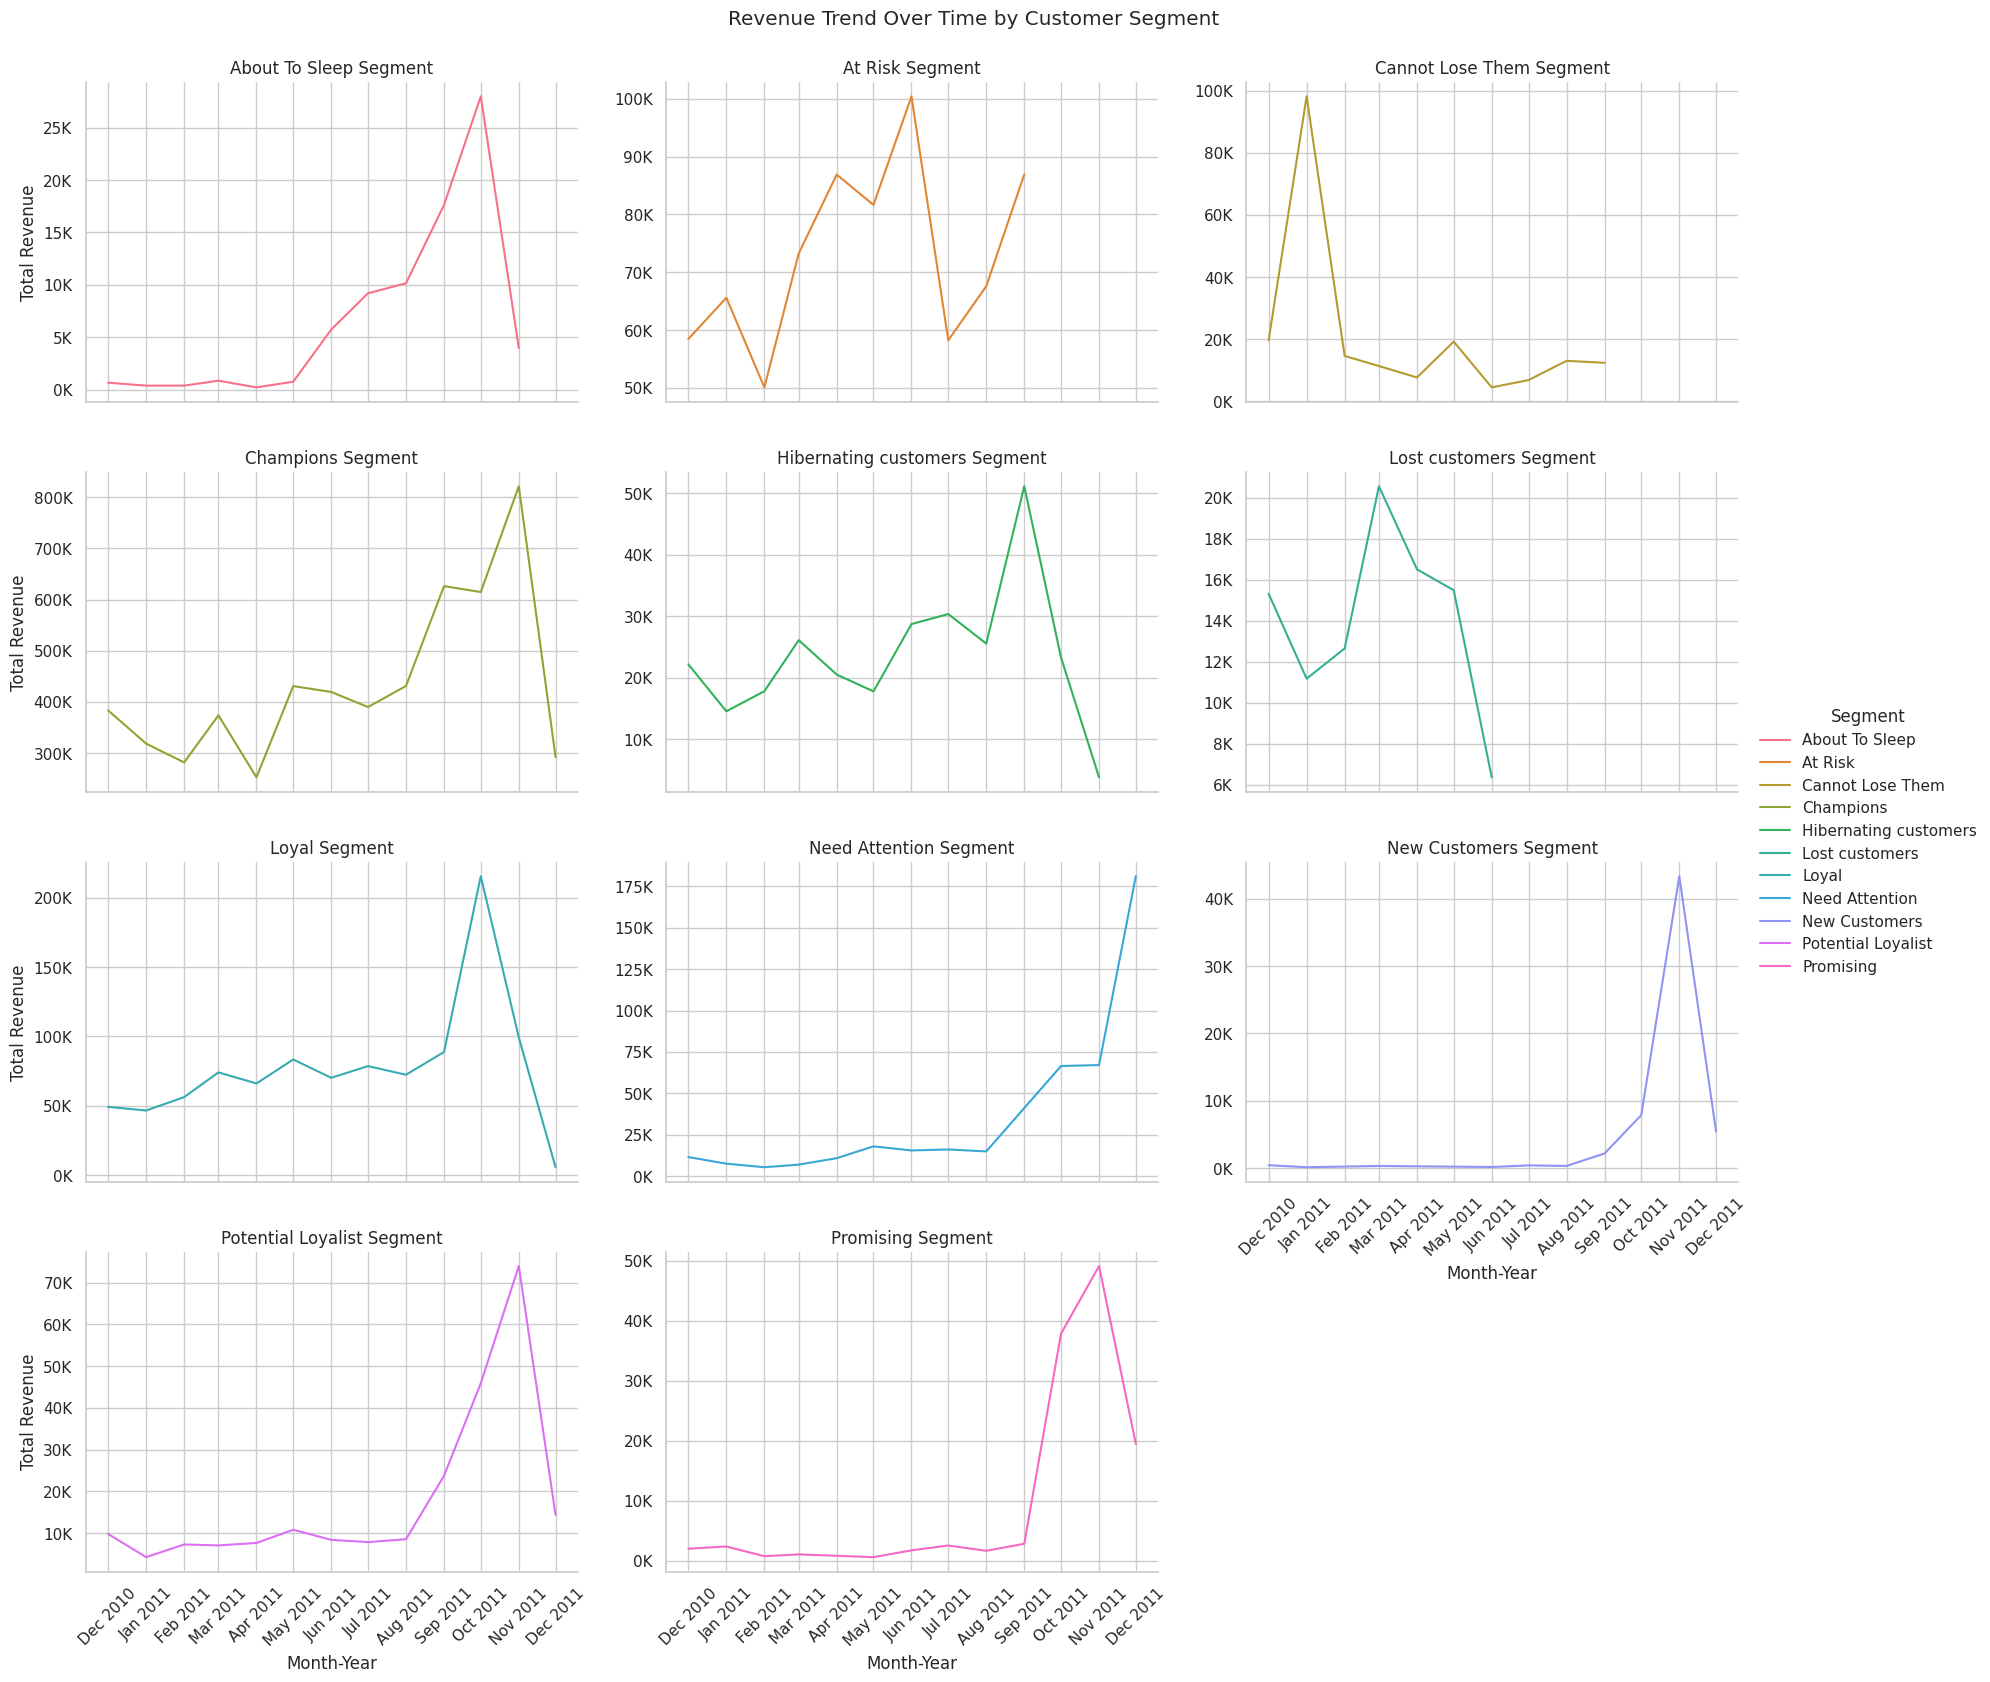

In [ ]:
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
# Extract month and year from 'InvoiceDate' for trend analysis
finaldata['YearMonth'] = finaldata['InvoiceDate'].dt.to_period('M').dt.to_timestamp() # Convert Period to Timestamp

# Aggregate revenue by segment and month
revenue_trend = finaldata.groupby(['YearMonth', 'Segment'])['Monetary'].sum().reset_index()

# Function to format y-axis in thousands
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)

# Plotting the trend of revenue over time for each segment
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
g = sns.relplot(
    data=revenue_trend,
    x='YearMonth', y='Monetary', hue='Segment',
    kind='line', col='Segment', col_wrap=3,
    height=4, aspect=1.5, facet_kws={'sharey': False}
)

# Enhance the plot
g.set_titles("{col_name} Segment")
g.set_axis_labels("Month-Year", "Total Revenue")
g.set_xticklabels(rotation=45)
g.fig.suptitle('Revenue Trend Over Time by Customer Segment', y=1.02)

# Format x-axis as month-year
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.yaxis.set_major_formatter(FuncFormatter(thousands))
    ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.show()

In [ ]:
# Tính tổng doanh thu theo các cột R_score, F_score và M_score
grouped = rfm_df.groupby(['R_score', 'F_score', 'M_score'])['Monetary'].sum().reset_index()
grouped2 = rfm_df.groupby(['R_score'])['Monetary'].sum().reset_index()
grouped3 = rfm_df.groupby(['F_score'])['Monetary'].sum().reset_index()
grouped4 = rfm_df.groupby(['M_score'])['Monetary'].sum().reset_index()

# Tính tổng Monetary của tất cả các giá trị
total_monetary = grouped['Monetary'].sum()

# Tính tỷ trọng cho mỗi giá trị trong R_score
grouped2['Weight R'] = grouped2['Monetary'] / total_monetary
grouped3['Weight F'] = grouped3['Monetary'] / total_monetary
grouped4['Weight M'] = grouped4['Monetary'] / total_monetary
# Kết hợp các DataFrame theo các cột phù hợp

print(grouped2)
print(grouped3)
print(grouped4)


  R_score     Monetary  Weight R
0       5  4664234.920  0.523400
1       4  1824147.201  0.204698
2       3  1103085.660  0.123784
3       2   760910.792  0.085386
4       1   559029.331  0.062732
  F_score     Monetary  Weight F
0       1   413577.220  0.046410
1       2   414722.882  0.046538
2       3   943492.611  0.105875
3       4  1242824.941  0.139464
4       5  5896790.250  0.661713
  M_score     Monetary  Weight M
0       1   133339.790  0.014963
1       2   311725.671  0.034981
2       3   597636.152  0.067064
3       4  1219268.830  0.136821
4       5  6649437.461  0.746171


In [ ]:
# Nhóm dữ liệu theo CustomerID và tính tổng monetary và tổng số lượng hóa đơn cho mỗi khách hàng
average_per_order_data = finaldata.groupby('CustomerID').agg({'Monetary': 'sum', 'InvoiceNo': 'count'}).reset_index()

# Tính giá trị bình quân mỗi đơn hàng
average_per_order_data['AvgOrderValue'] = average_per_order_data['Monetary'] / average_per_order_data['InvoiceNo']

print(average_per_order_data.head())

   CustomerID  Monetary  InvoiceNo  AvgOrderValue
0     12346.0  77183.60          1   77183.600000
1     12347.0   4310.00        182      23.681319
2     12348.0   1797.24         31      57.975484
3     12349.0   1757.55         73      24.076027
4     12350.0    334.40         17      19.670588


In [ ]:
rfm_df2 = rfm_df.merge(average_per_order_data, on='CustomerID', how='inner')
print(rfm_df2.head())

   CustomerID  Recency  Frequency  Monetary_x R_score M_score  rank fre  \
0     12346.0      325          1    77183.60       1       5       1.0   
1     12347.0        1          7     4310.00       5       5    3642.0   
2     12348.0       74          4     1797.24       2       4    2837.0   
3     12349.0       18          1     1757.55       4       4       2.0   
4     12350.0      309          1      334.40       1       2       3.0   

  F_score RFM_Score           Segment  Monetary_y  InvoiceNo  AvgOrderValue  
0       1       115  Cannot Lose Them    77183.60          1   77183.600000  
1       5       555         Champions     4310.00        182      23.681319  
2       4       244           At Risk     1797.24         31      57.975484  
3       1       414         Promising     1757.55         73      24.076027  
4       1       112    Lost customers      334.40         17      19.670588  


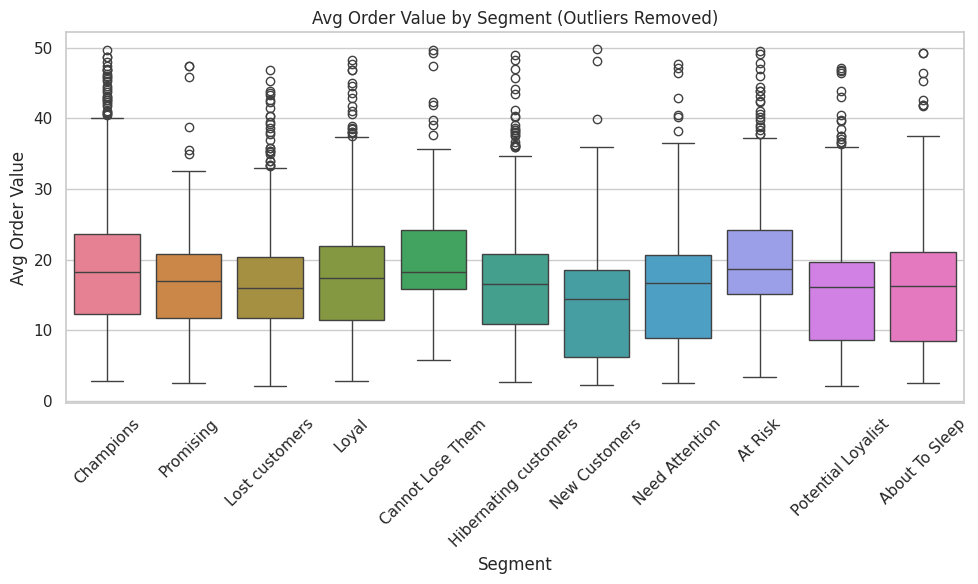

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loại bỏ outlier từ DataFrame
Q1 = rfm_df2['AvgOrderValue'].quantile(0.25)
Q3 = rfm_df2['AvgOrderValue'].quantile(0.75)
IQR = Q3 - Q1

# Tính toán giới hạn dưới và giới hạn trên
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

# Lọc ra các dòng không nằm ngoài giới hạn
filtered_data = rfm_df2[(rfm_df2['AvgOrderValue'] >= lower_bound) & (rfm_df2['AvgOrderValue'] <= upper_bound)]

# Vẽ boxplot cho dữ liệu đã lọc
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='AvgOrderValue', data=filtered_data,hue = 'Segment')

# Thêm tiêu đề và nhãn
plt.title('Avg Order Value by Segment (Outliers Removed)')
plt.xlabel('Segment')
plt.ylabel('Avg Order Value')

# Hiển thị biểu đồ
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
pip install joypy

<Figure size 1200x800 with 0 Axes>

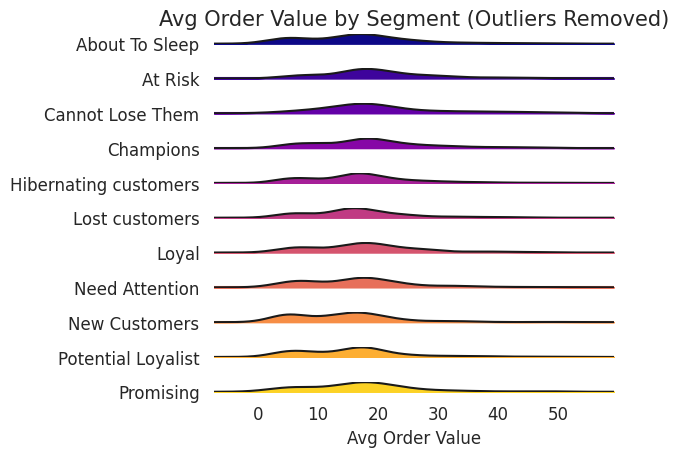

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from joypy import joyplot

# Loại bỏ outlier từ DataFrame
Q1 = rfm_df2['AvgOrderValue'].quantile(0.25)
Q3 = rfm_df2['AvgOrderValue'].quantile(0.75)
IQR = Q3 - Q1

# Tính toán giới hạn dưới và giới hạn trên
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

# Lọc ra các dòng không nằm ngoài giới hạn
filtered_data = rfm_df2[(rfm_df2['AvgOrderValue'] >= lower_bound) & (rfm_df2['AvgOrderValue'] <= upper_bound)]

# Vẽ Ridgeline plot cho dữ liệu đã lọc
plt.figure(figsize=(12, 8))
joyplot(
    data=filtered_data,
    by='Segment',
    column='AvgOrderValue',
    ylim='own',
    colormap=plt.cm.plasma
)

# Thêm tiêu đề và nhãn
plt.title('Avg Order Value by Segment (Outliers Removed)', fontsize=15)
plt.xlabel('Avg Order Value')
plt.ylabel('Segment')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


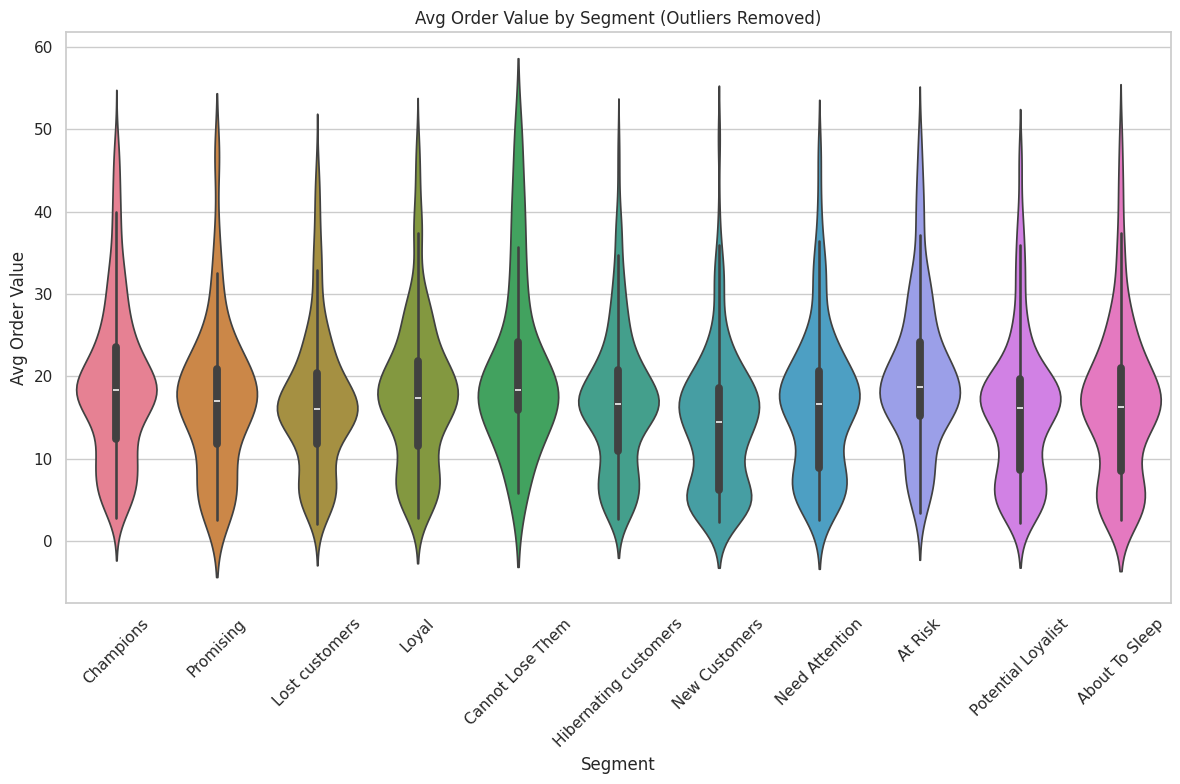

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loại bỏ outlier từ DataFrame
Q1 = rfm_df2['AvgOrderValue'].quantile(0.25)
Q3 = rfm_df2['AvgOrderValue'].quantile(0.75)
IQR = Q3 - Q1

# Tính toán giới hạn dưới và giới hạn trên
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

# Lọc ra các dòng không nằm ngoài giới hạn
filtered_data = rfm_df2[(rfm_df2['AvgOrderValue'] >= lower_bound) & (rfm_df2['AvgOrderValue'] <= upper_bound)]

# Vẽ violin plot cho dữ liệu đã lọc
plt.figure(figsize=(12, 8))
sns.violinplot(x='Segment', y='AvgOrderValue', data=filtered_data,hue='Segment')

# Thêm tiêu đề và nhãn
plt.title('Avg Order Value by Segment (Outliers Removed)')
plt.xlabel('Segment')
plt.ylabel('Avg Order Value')

# Hiển thị biểu đồ
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


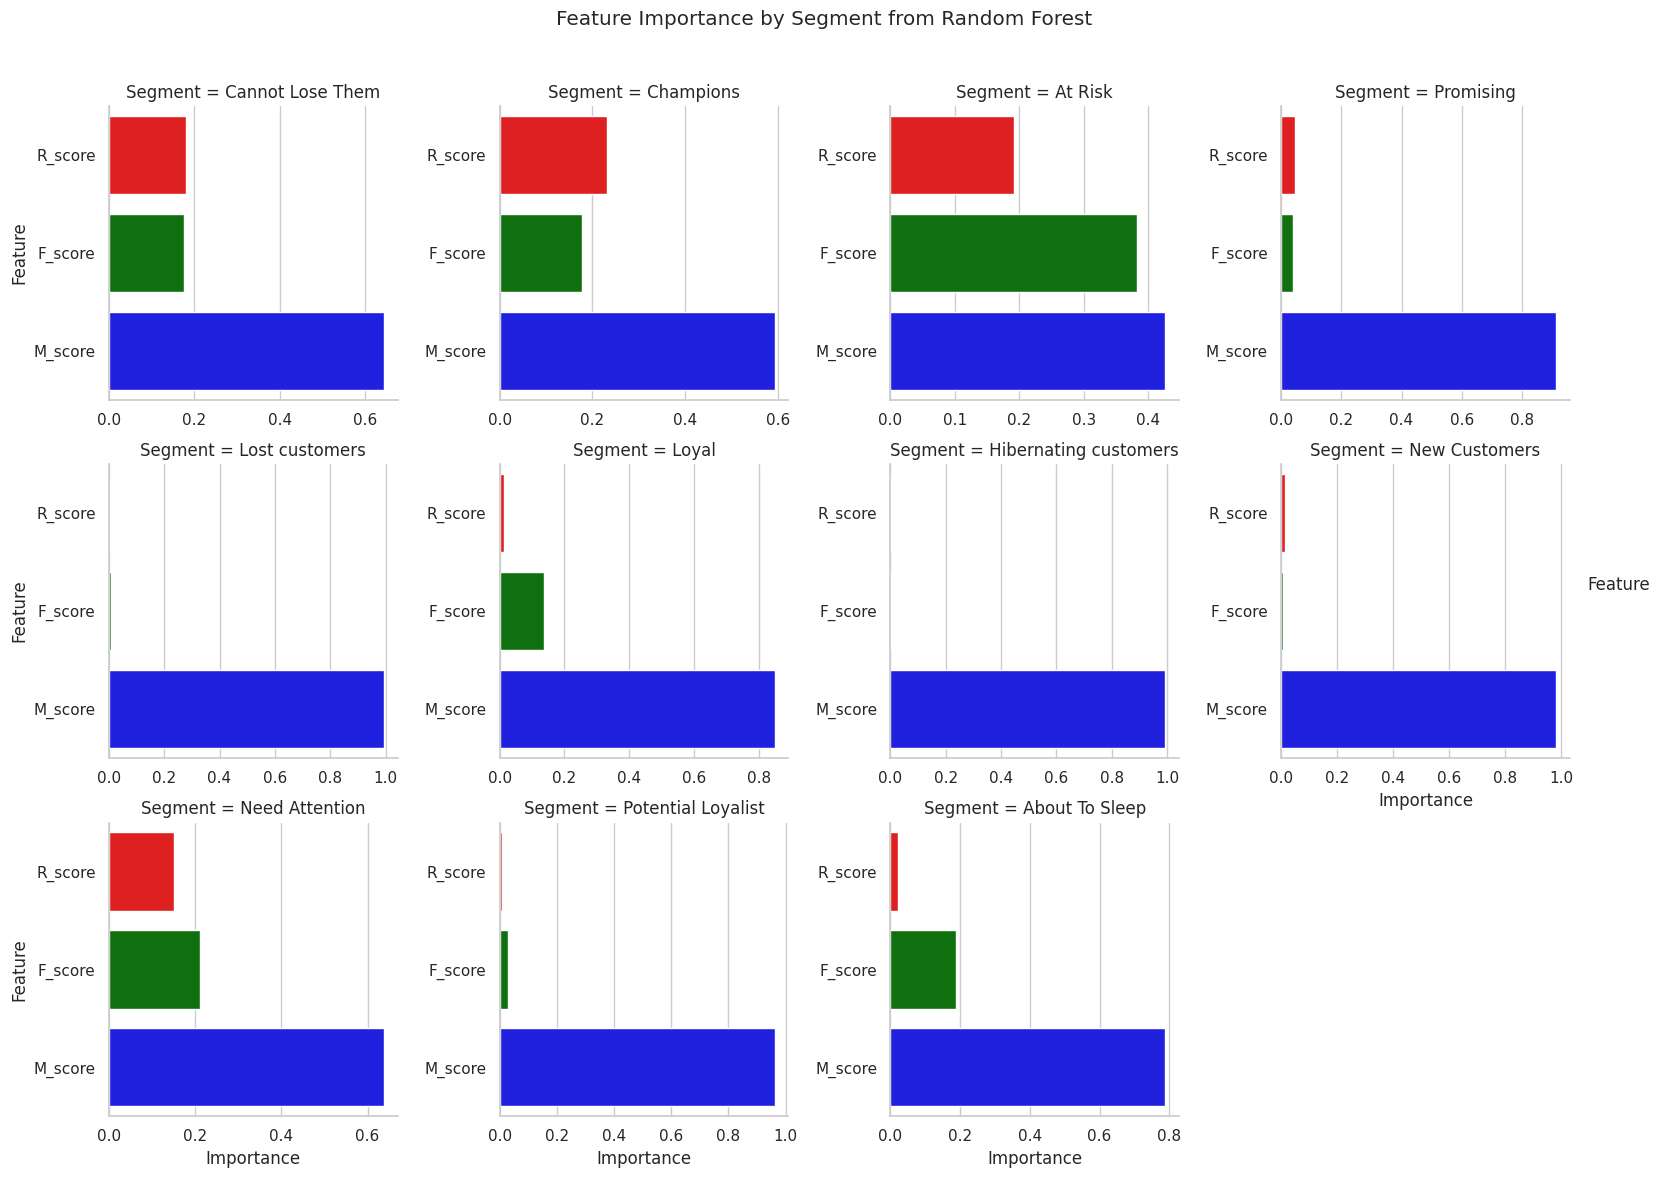

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Giả sử rfm_df là DataFrame của bạn
# Lấy danh sách các segment
segments = rfm_df['Segment'].unique()

# Tạo một DataFrame để lưu trữ tầm quan trọng của các đặc trưng
importance_df = pd.DataFrame()

# Huấn luyện mô hình Random Forest cho từng segment và lưu trữ tầm quan trọng
for segment in segments:
    segment_data = rfm_df[rfm_df['Segment'] == segment]
    X = segment_data[['R_score', 'F_score', 'M_score']]
    y = segment_data['Monetary']

    rf = RandomForestRegressor(n_estimators=200, random_state=42,max_depth=10)
    rf.fit(X, y)

    feature_importances = rf.feature_importances_

    temp_df = pd.DataFrame({
        'Segment': segment,
        'Feature': X.columns,
        'Importance': feature_importances
    })

    importance_df = pd.concat([importance_df, temp_df], ignore_index=True)

# Xem bảng view của tầm quan trọng các đặc trưng cho từng segment
importance_df

# Thiết lập FacetGrid với mỗi hàng chứa tối đa 4 khung
g = sns.FacetGrid(importance_df, col="Segment", col_wrap=4, height=4, sharex=False, sharey=False)

# Vẽ biểu đồ thanh (barplot) cho từng segment với màu sắc cho từng đặc trưng
palette = {'R_score': 'red', 'F_score': 'green', 'M_score': 'blue'}
g.map_dataframe(sns.barplot, x="Importance", y="Feature", hue="Feature", palette=palette, dodge=False)

# Thêm tiêu đề
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Feature Importance by Segment from Random Forest')

# Điều chỉnh để hiển thị chú giải duy nhất
g.add_legend(title='Feature')

# Hiển thị biểu đồ
plt.show()





**Trường Hợp Monetary (M) Chiếm Tỷ Trọng Lớn**
Kết Luận:

Giá trị chi tiêu của khách hàng là yếu tố quan trọng nhất. Khách hàng có giá trị chi tiêu cao nên được ưu tiên chăm sóc và giữ chân.

***Định Hướng Chiến Lược:***

**Tập Trung Vào Khách Hàng Có Giá Trị Cao:**
Tạo các chương trình khách hàng thân thiết, ưu đãi đặc biệt cho nhóm khách hàng này.

**Khuyến Khích Tăng Giá Trị Đơn Hàng:**
Triển khai các chương trình khuyến mãi cho đơn hàng lớn, giảm giá khi mua số lượng nhiều.

**Nâng Cao Trải Nghiệm Khách Hàng:**
Cải thiện dịch vụ chăm sóc khách hàng, đảm bảo chất lượng sản phẩm và dịch vụ hậu mãi tốt.

**Trường Hợp Recency (R) Chiếm Tỷ Trọng Lớn**
Kết Luận:

Thời gian gần nhất khách hàng mua hàng là yếu tố quan trọng nhất. Điều này cho thấy sự mua sắm gần đây của khách hàng có ảnh hưởng lớn đến giá trị chi tiêu.

***Định Hướng Chiến Lược:***

**Tăng Tần Suất Giao Tiếp Với Khách Hàng Mới:**
Gửi email hoặc thông báo khuyến mãi ngay sau khi khách hàng mua hàng.

**Chương Trình Khuyến Mãi Sau Mua Hàng:**
Cung cấp các ưu đãi đặc biệt cho khách hàng trong vòng một tháng sau khi họ mua hàng.

**Khuyến Khích Lần Mua Tiếp Theo:**
Đưa ra các chương trình khuyến mãi để khuyến khích khách hàng quay lại mua sắm sớm hơn.

**Trường Hợp Frequency (F) Chiếm Tỷ Trọng Lớn**
Kết Luận:

Tần suất mua hàng là yếu tố quan trọng nhất. Khách hàng mua hàng thường xuyên có giá trị cao và cần được giữ chân.

***Định Hướng Chiến Lược:***

**Tạo Chương Trình Khách Hàng Thân Thiết:**
Cung cấp điểm thưởng cho mỗi lần mua hàng, giúp khách hàng tích điểm và nhận các phần thưởng hấp dẫn.

**Chương Trình Khuyến Mãi Định Kỳ:**
Triển khai các chương trình khuyến mãi định kỳ như giảm giá hàng tháng, quà tặng khi mua hàng nhiều lần.

**Gửi Email/Thông Báo Khuyến Mãi Định Kỳ:**
Thường xuyên gửi email hoặc thông báo về các chương trình khuyến mãi mới, sản phẩm mới để duy trì sự quan tâm của khách hàng.

 **Tổng kết**

Monetary (M) Chiếm Tỷ Trọng Lớn:
Tập trung vào tăng giá trị đơn hàng và chăm sóc khách hàng có giá trị cao.

Recency (R) Chiếm Tỷ Trọng Lớn:
Tăng tần suất giao tiếp và khuyến khích khách hàng quay lại mua sắm sớm hơn.

Frequency (F) Chiếm Tỷ Trọng Lớn:
Tạo động lực để khách hàng mua hàng thường xuyên thông qua các chương trình khách hàng thân thiết và khuyến mãi định kỳ.